## Business Case

Following the 2008 crises, many banks faced a liquidity crisis. In response, they launched marketing campaigns to attract more investments. As part of recovery efforts, this Portuguese bank utilized direct marketing (one on one sales calls) to reach clients and promote term deposits. The objective of the campaigns was to encourage investments.

In this analysis, we will identify the factors that influence clients' decisions to either subscribe to or opt out of term deposits. The insights gained can help the bank optimize its future marketing strategies and allocate resources effectively to target the specific segment more likely to subscribe.

Dataset Total clients contacted: 4,521
Clients who subscribed: 11.52%
Clients who did not subscribe: 88.48%

## Data Source

**UC Irvine Machine Learning Repository**

https://archive.ics.uci.edu/dataset/222/bank+marketing



There were four datasets in total bank-additional-full.csv with all examples (41188), bank-additional.csv with 10% of the examples (4119), bank-full.csv, and bank.csv with 10% of the examples. We chose: bank.csv with 10% of the examples for this analysis.



Target Variable is Y



Yes = 1 (client subscribed)

No = 0 (client did not subscribe)





There are 16 features in total. We will use ‘job’, ‘age’, ‘marital’, ‘education’, ‘default’, ‘balance’, ‘housing’, ‘loan’, ‘pdays’, ‘previous’, ‘campaign’, ‘poutcomes’ as our predictors for ‘y’.




We have dropped ‘contact’, ‘day’, and ‘month’ from the analysis as these variables won’t influence the client’s decision to subscribe or not subscribe for the term deposit. Furthermore, we dropped duration as well because it won’t be known until the call is placed.

## Summary Statistics

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()

import io

file_name = list(uploaded.keys())[0]
bank = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving bank_cleaned-1.csv to bank_cleaned-1.csv


In [ ]:
# Selecting the columns

bank_selected = bank[['job', 'age', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'pdays', 'previous', 'campaign','poutcome', 'y']]

In [ ]:
# Summary Statistics for Numerical Variables

bank_selected.describe()

,age,balance,pdays,previous,campaign
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,39.766645,0.542579,2.793630
std,10.576211,3009.638142,100.121124,1.693562,3.109807
min,19.000000,-3313.000000,-1.000000,0.000000,1.000000
25%,33.000000,69.000000,-1.000000,0.000000,1.000000
50%,39.000000,444.000000,-1.000000,0.000000,2.000000
75%,49.000000,1480.000000,-1.000000,0.000000,3.000000
max,87.000000,71188.000000,871.000000,25.000000,50.000000


The average age of clients is around 41, with most falling between 33 and 49 years, and the youngest being 19 and the oldest 87. Bank balances vary widely, with an average of 1,423 units, but many clients have low balances, and a few have very high balances, leading to a high standard deviation. Most clients have not been previously contacted, as shown by a predominant -1 value for "pdays" (days since last contact) and zero in the "previous" column (previous contacts), though a few have been contacted multiple times in prior campaigns. On average, clients were contacted about 2-3 times during the current campaign, but a small number were contacted up to 50 times. This data reflects a highly varied customer base in terms of financial health and engagement with marketing efforts.

## Target Variable, Pairplots, Data Distribution, Correlation Analysis, and Examining Missing Values

In [ ]:
data = {'y': ['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
              'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
              'no', 'no', 'no', 'no']}

df = pd.DataFrame(bank_selected)

# Convert 'yes' to 1 and 'no' to 0
df['y_binary'] = df['y'].map({'yes': 1, 'no': 0})

<Axes: >

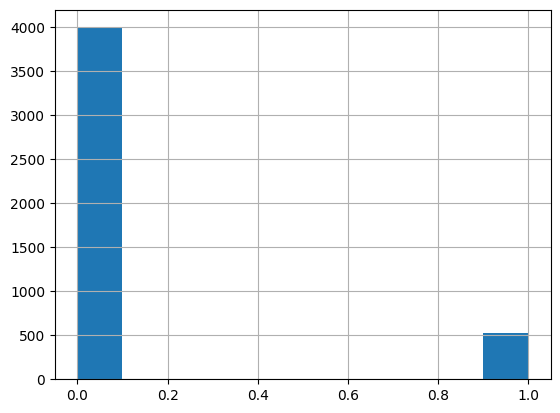

In [ ]:
# Evaluate target variable distribution

df.y_binary.hist()

This distribution highlights a significant imbalance, as the majority of clients have not subscribed to a term deposit. This indicates that most clients opted not to invest in term deposits, which could provide valuable insights for refining marketing strategies or gaining a better understanding of client preferences.

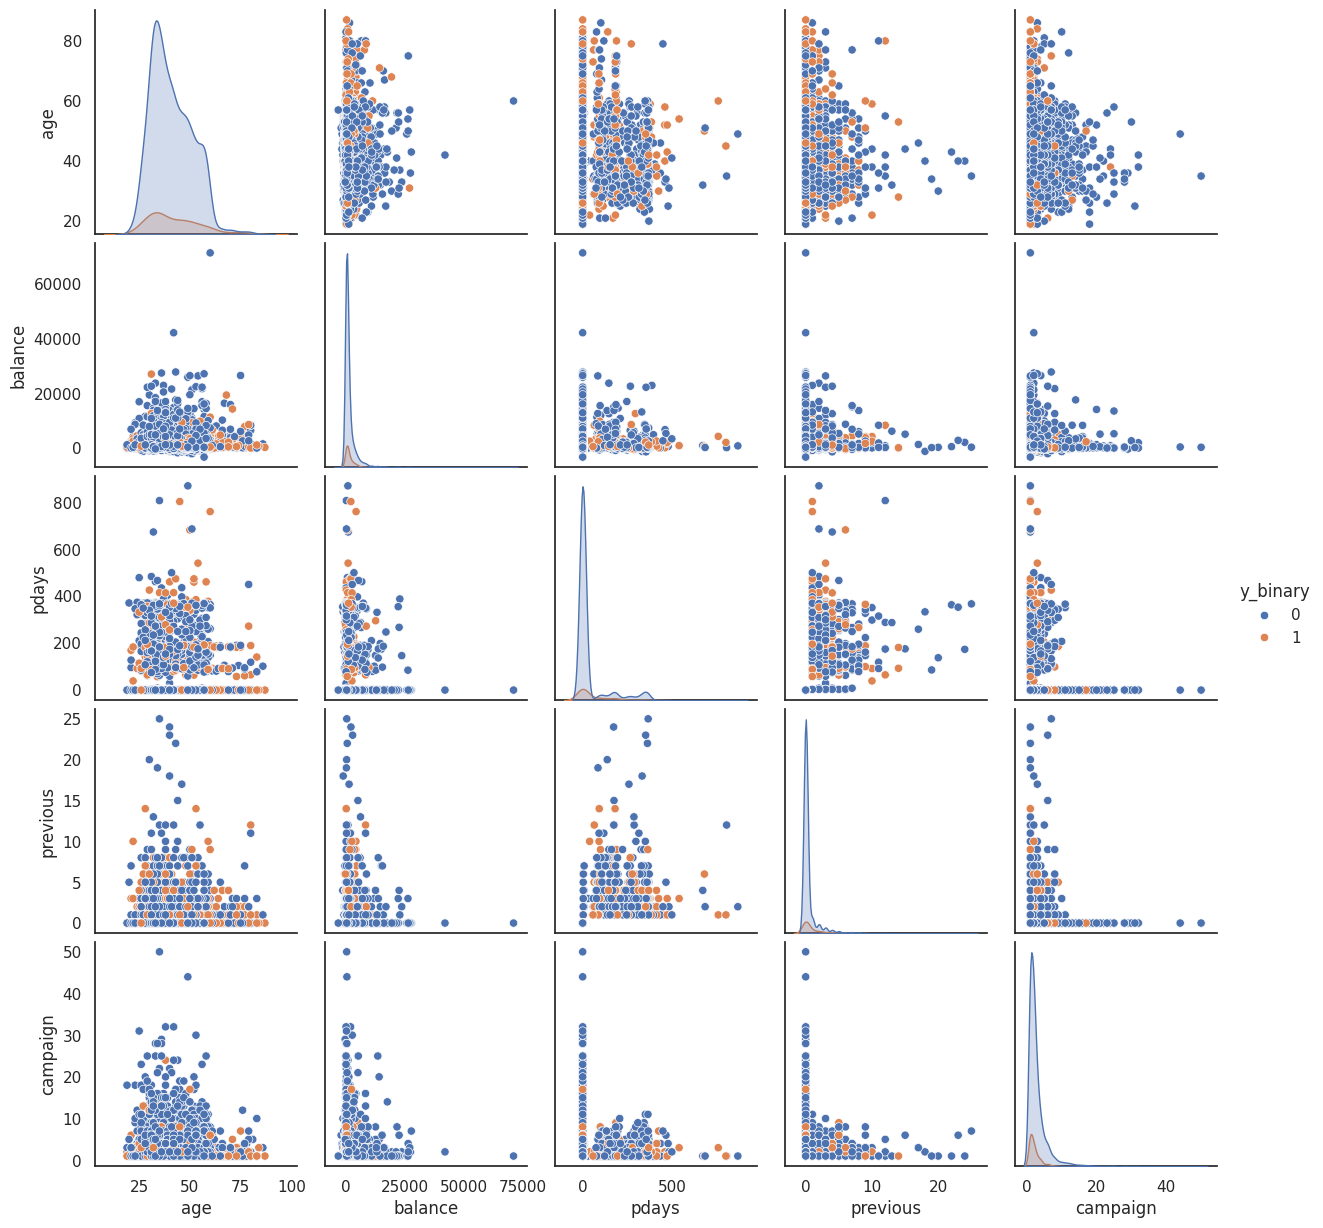

In [ ]:
#Exploring pairplots

import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df, hue = 'y_binary')


The pairplot reveals that balance and previous contacts show some correlation with the likelihood of a positive outcome (y_binary = 1), as clients with higher balances and more previous contacts are more likely to fall into this category. In contrast, variables like age, pdays, and campaign display significant overlap between the two outcomes, indicating weaker predictive power, although clients contacted more frequently or with very high pdays may still show some trends. Most clients have low balances, minimal prior contacts, and limited campaign engagement, with few extreme outliers skewing the data.

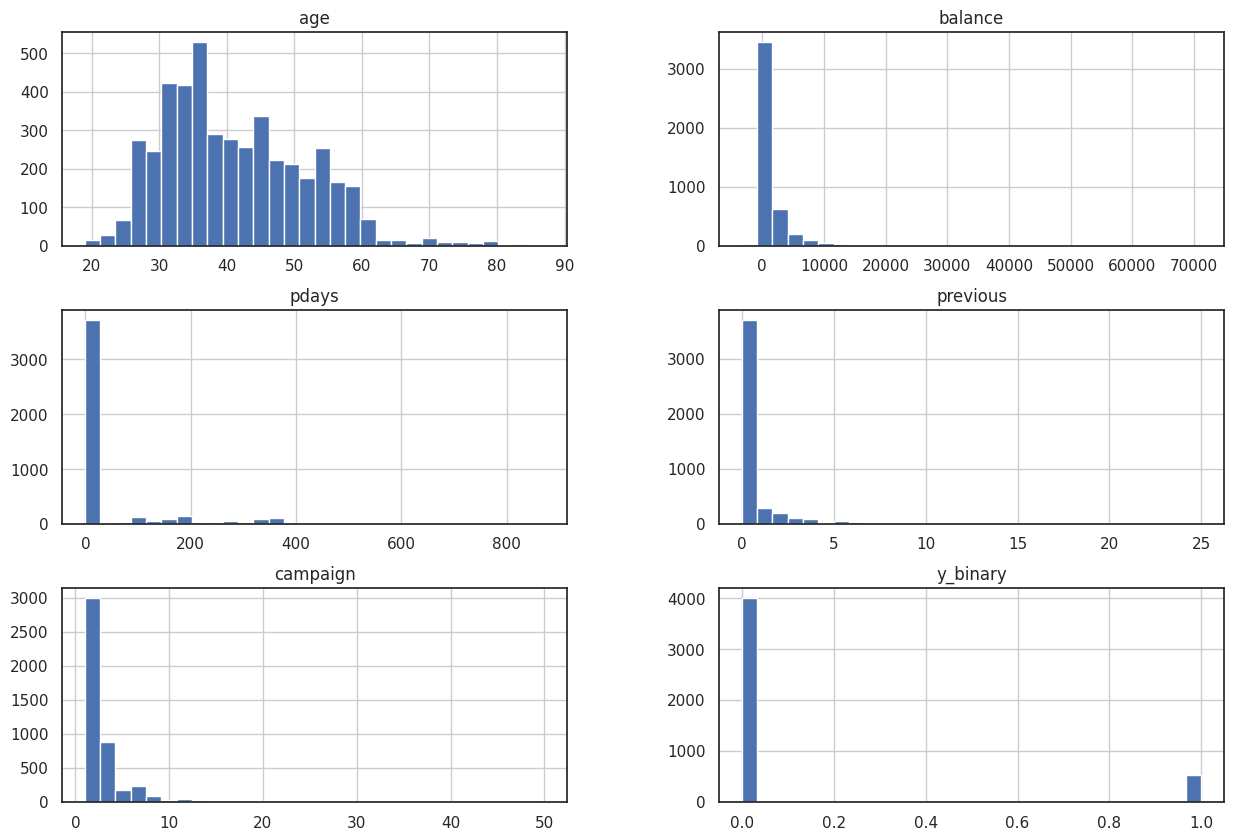

In [ ]:
#Examining data distribution

import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(15, 10))
plt.show()

Age: The distribution is right-skewed, with most clients between the ages of 30 and 50. There is a notable drop-off after age 60, indicating fewer older clients.

Balance: The majority of clients have a balance close to zero, with a sharp right-skew. A few clients have very large balances, but these are outliers.

Day: This represents the day of the month the last contact was made. The distribution is fairly uniform, with contacts spread across the days of the month without any clear patterns.

Duration: This variable is heavily right-skewed, with most calls lasting less than 500 seconds. Longer calls are rare but are likely significant in determining a positive outcome (y_binary = 1).

Campaign: Most clients were contacted only a few times during the current campaign. Very few were contacted more than 10 times, indicating the campaign is not overly aggressive.

Pdays: Most of the values are clustered at zero (or close to it), which likely corresponds to the clients who were never contacted in a previous campaign or hadn't been contacted recently.

Previous: This variable indicates the number of contacts made before the current campaign. Most clients have not been contacted before, but a small number have been contacted multiple times.

y_binary:. The histogram shows that the majority of clients did not subscribe (0), while only a small percentage did (1), reflecting the imbalance in the target variable.


<Axes: >

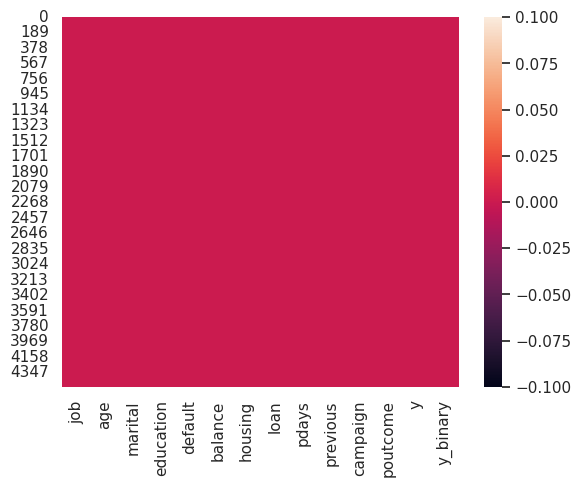

In [ ]:
# Exploring the missing values

sns.heatmap(df.isnull(), cbar=True)

<Axes: >

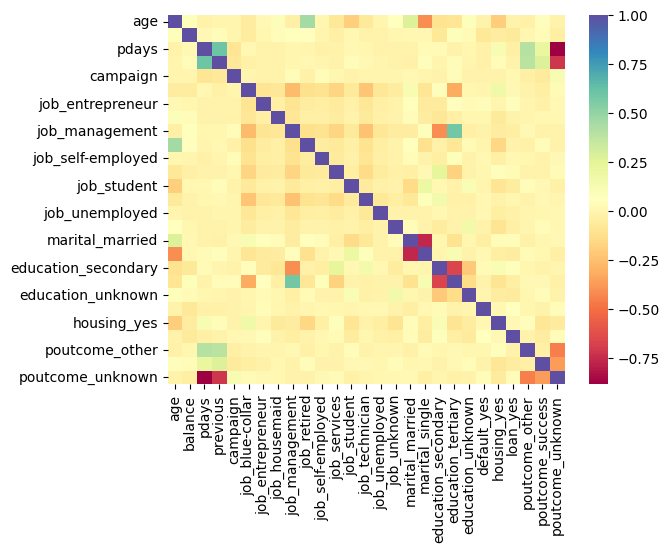

In [ ]:
#Correlation analysis

df_corr = pd.get_dummies(X, drop_first=True)

correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, cmap="Spectral")

## Data Preprocessing

In [ ]:
#Dropping outliers

df.drop(df[df['pdays'] > 500].index, inplace=True)
df.drop(df[df['previous'] > 20].index, inplace=True)
df.drop(df[df['campaign'] > 40].index, inplace=True)
df.drop(df[df['balance'] > 40000].index, inplace=True)

In [ ]:
# Drop 'y_binary' and 'y' columns from the DataFrame
X = df.drop(['y_binary', 'y'], axis=1)
y = df['y_binary']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic Regression

In [ ]:
# Creating Logistic Regression model

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

y_pred = logmodel.predict(X_test)

[[1170   15]
 [ 145   22]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1185
           1       0.59      0.13      0.22       167

    accuracy                           0.88      1352
   macro avg       0.74      0.56      0.58      1352
weighted avg       0.85      0.88      0.85      1352

ROC AUC: 0.56


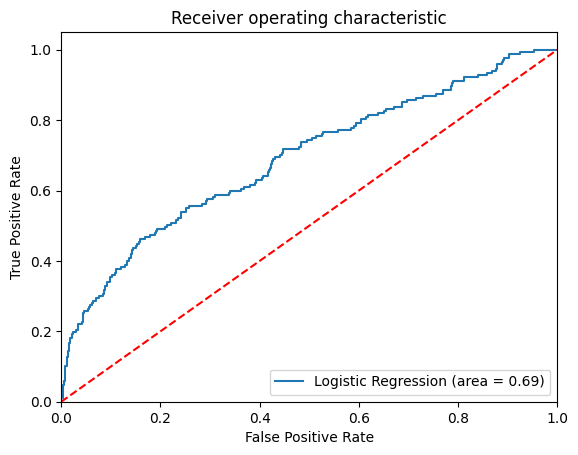

In [ ]:
# Logistic regression model

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,y_pred))

# Accuracy, Recall, Precision
print(classification_report(y_test,y_pred))

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc:.2f}")

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

While the model performs well in predicting the majority class (class 0), it struggles significantly with the minority class (class 1), as seen in the low recall (13%) and F1-score (0.22). This imbalance is reflected in the overall accuracy (88%), which is skewed by the high performance on class 0. The low ROC AUC (0.56) further confirms that the model does not effectively distinguish between the two classes. Improvements such as addressing class imbalance (e.g., through oversampling or adjusting class weights) could enhance performance on the minority class.

## Decision Tree Model

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1185
           1       0.56      0.16      0.25       167

    accuracy                           0.88      1352
   macro avg       0.73      0.57      0.59      1352
weighted avg       0.85      0.88      0.85      1352

ROC AUC: 0.59


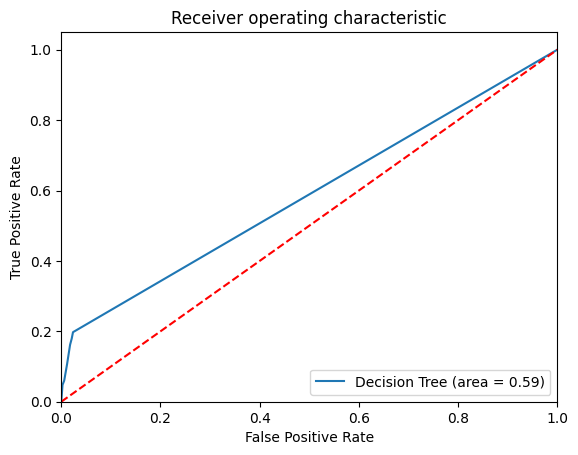

In [ ]:
# Develop a Decision Tree Model

from sklearn import tree
dt_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)

dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
print(f"ROC AUC: {dt_roc_auc:.2f}")

dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


The decision tree model performs well for the majority class (class 0), achieving high precision, recall, and F1-score. However, like the logistic regression model, it struggles with the minority class (class 1), as evidenced by low recall (16%) and a low F1-score (0.25). The overall accuracy (88%) and ROC AUC (0.59) suggest the model's ability to distinguish between the classes is limited, especially for class 1. To improve, techniques such as adjusting the tree’s depth, using class weights, or handling class imbalance (e.g., oversampling, undersampling) could help boost performance for the minority class.

## Random Forest and Boosted Tree Model

In [ ]:
# Developing Random forest

from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred_rf))
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
print(rf_roc_auc)

[[1164   21]
 [ 140   27]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1185
           1       0.70      0.08      0.15       167

    accuracy                           0.88      1352
   macro avg       0.79      0.54      0.54      1352
weighted avg       0.86      0.88      0.84      1352

0.7076909472194851


The random forest model performs well on the majority class (class 0), achieving high precision, recall, and F1-score. For the minority class (class 1), it improves precision (0.70) compared to previous models, but recall remains very low (0.08), resulting in a poor F1-score (0.15). The overall accuracy (88%) and ROC AUC (0.71) indicate some improvement in distinguishing between the two classes, but the model still struggles to capture class 1 instances. Addressing class imbalance or fine-tuning the model (e.g., using class weights, balancing techniques) could help improve recall and overall performance for the minority class.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[1164   21]
 [ 140   27]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1185
           1       0.56      0.14      0.23       167

    accuracy                           0.88      1352
   macro avg       0.72      0.56      0.58      1352
weighted avg       0.85      0.88      0.85      1352

0.705783369968923


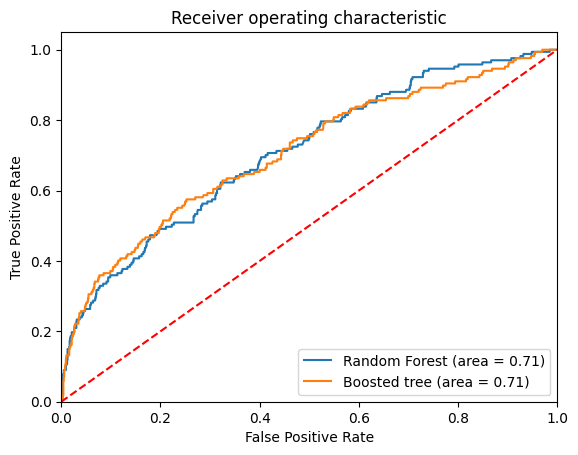

In [ ]:
# Developing Boosted tree model

from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

print(confusion_matrix(y_test,y_pred))
y_pred_bt = bt_model.predict(X_test)
print(classification_report(y_test,y_pred_bt))

bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
print(bt_roc_auc)

# Calculate fpr and tpr for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

# Calculate fpr and tpr for Boosted Tree
bt_fpr, bt_tpr, _ = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The boosted tree model performs well on the majority class (class 0), with high precision, recall, and F1-score. For the minority class (class 1), precision improves slightly (0.56), but recall remains low (0.14), leading to a poor F1-score (0.23). The overall accuracy is high (88%), but like other models, it is driven by the class imbalance. The ROC AUC of 0.71 indicates the model has decent discriminatory ability, but improvements could be made, especially in identifying class 1. Techniques like adjusting the boosting algorithm parameters or focusing on the class imbalance could improve its performance on the minority class.

## Naive Bayes

[[1005  180]
 [ 115   52]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1185
           1       0.22      0.31      0.26       167

    accuracy                           0.78      1352
   macro avg       0.56      0.58      0.57      1352
weighted avg       0.81      0.78      0.80      1352

0.5408777381944971


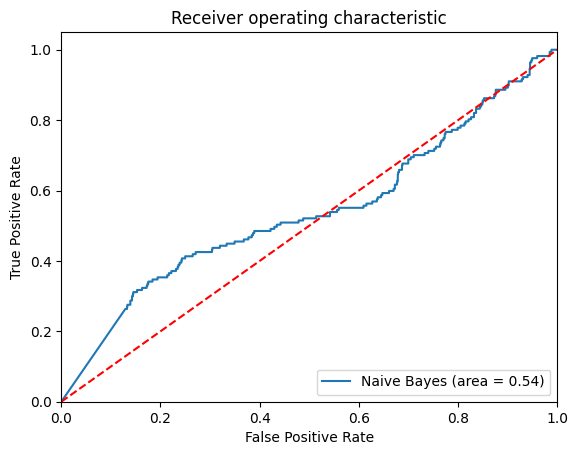

In [ ]:
#Developing Naive Bayes

# Apply a transformation to ensure non-negative values
!pip install numpy
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt

X_train_transformed = np.abs(X_train)

# Fit the model with the transformed data
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train_transformed, y_train)

y_pred = delays_nb.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
nb_roc_auc = roc_auc_score(y_test, delays_nb.predict_proba(X_test)[:,1])
print(nb_roc_auc)

# Calculate fpr and tpr for Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_test, delays_nb.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The Naive Bayes model demonstrates solid performance for the majority class (class 0), achieving high precision, recall, and F1-score. However, for the minority class (class 1), while precision shows a marginal increase (0.22), recall remains notably low (0.31), resulting in a subpar F1-score (0.26). The overall accuracy stands at 78%, which, similar to other models, is heavily influenced by the class imbalance. The ROC AUC score of 0.54 suggests that the model’s ability to distinguish between classes is limited, particularly in recognizing class 1. To enhance performance, strategies such as rebalancing the dataset, employing different classification techniques, or fine-tuning the model’s parameters may be beneficial, especially for improving the identification of the minority class.

## KNN Model

Optimal value of k on ROC AUC: 31


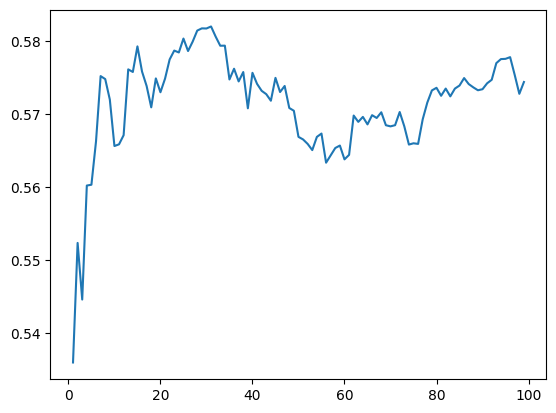

In [ ]:
# Find the value of k with the highest roc_auc
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())

sns.lineplot(x=range(1,max_K), y=cv_scores)

optimal_k = np.argmax(cv_scores) + 1
print(f"Optimal value of k on ROC AUC: {optimal_k}")

[[1169   16]
 [ 143   24]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1185
           1       0.60      0.14      0.23       167

    accuracy                           0.88      1352
   macro avg       0.75      0.57      0.58      1352
weighted avg       0.86      0.88      0.85      1352

ROC AUC:  0.6645695949872408


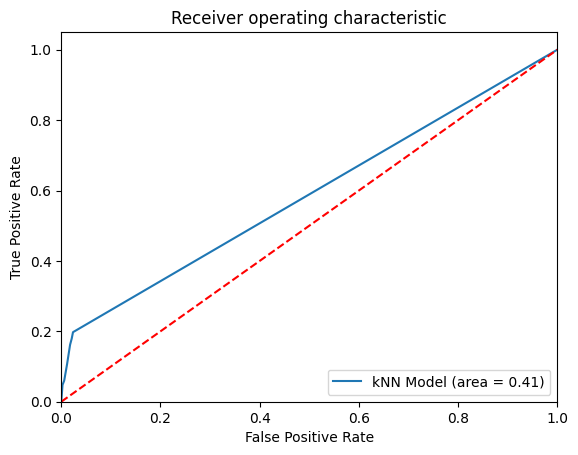

In [ ]:
# Developing a KNN model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

knn = KNeighborsClassifier(n_neighbors=31, metric='euclidean')

knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_pred_proba))

kNN_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='kNN Model (area = %0.2f)' % kNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The model struggles with the minority class (class 1), achieving a precision of 0.60 but a low recall of 0.14, which leads to a poor F1-score of 0.23. Overall, the model's accuracy is commendable at 88%, yet this metric is influenced by the class imbalance present in the dataset. The ROC AUC score of approximately 0.66 indicates that while the model has some ability to discriminate between classes, it still has room for improvement, particularly in identifying instances of class 1.

## Tensorflow Keras

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(3153, 27)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.7165 - val_loss: 0.4665
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4390 - val_loss: 0.3609
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4034 - val_loss: 0.3546
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4040 - val_loss: 0.3510
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3566 - val_loss: 0.3472
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3687 - val_loss: 0.3458
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3684 - val_loss: 0.3448
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3600 - val_loss: 0.3445
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3332 - val_loss: 0.3439
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3424 - val_loss: 0.3441
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3601 - val_loss: 0.3428
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

<Axes: >

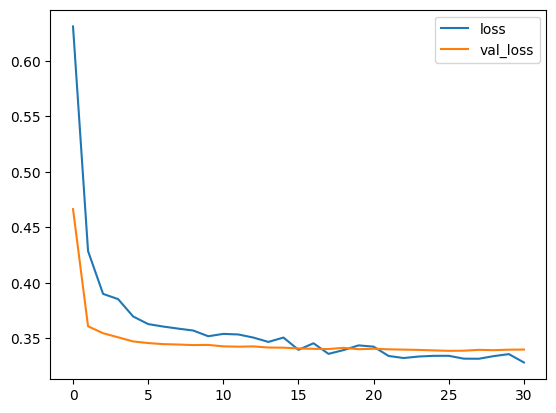

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
# Confusion matrix, classification report, ROC AUC

y_pred =(model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score
print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))
print('ROC AUC: ', roc_auc_score(y_test,model.predict(X_test)))

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1185
           1       0.58      0.11      0.19       167

    accuracy                           0.88      1352
   macro avg       0.73      0.55      0.56      1352
weighted avg       0.85      0.88      0.84      1352

[[1171   14]
 [ 148   19]]
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ROC AUC:  0.6937719497713434


The Keras TensorFlow model shows good performance for class 0 with a precision of 0.89, recall of 0.99, and an F1-score of 0.94, but struggles significantly with class 1, where recall is just 0.11 and the F1-score is only 0.19. The overall accuracy of 88% is misleading due to the model's bias towards the majority class (class 0). The ROC AUC of 0.69 indicates some ability to distinguish between classes, but there's room for improvement in identifying class 1.

## Combined ROC Curve, Conclusion, Recommendations, and Next Steps

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.6138 - val_loss: 0.3974
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4071 - val_loss: 0.3560
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4210 - val_loss: 0.3546
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3923 - val_loss: 0.3504
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3819 - val_loss: 0.3458
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3724 - val_loss: 0.3446
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3775 - val_loss: 0.3427
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3581 - val_loss: 0.3425
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3694 - val_loss: 0.3417
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3415 - val_loss: 0.3399
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3537 - val_loss: 0.3404
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

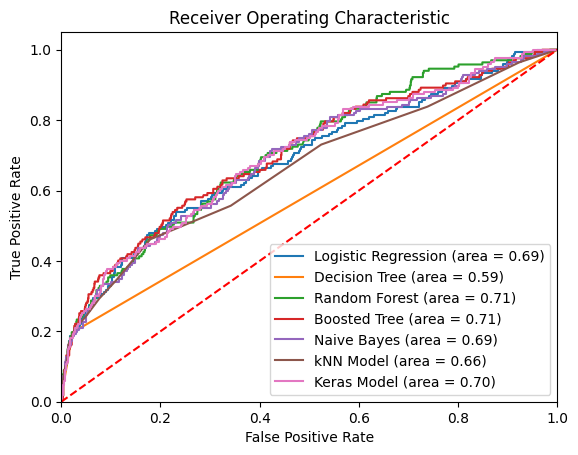

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming you already have X_train, X_test, y_train, y_test defined.

# Initialize the plot
plt.figure()

# Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logit_probs = logmodel.predict_proba(X_test)[:, 1]  # Using .predict_proba() method
logit_roc_auc = roc_auc_score(y_test, logit_probs)
fpr, tpr, _ = roc_curve(y_test, logit_probs)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Decision Tree
dt_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
dt_model.fit(X_train, y_train)
dt_probs = dt_model.predict_proba(X_test)[:, 1]  # Using .predict_proba() method
dt_roc_auc = roc_auc_score(y_test, dt_probs)
fpr, tpr, _ = roc_curve(y_test, dt_probs)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Random Forest
rf_model = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Using .predict_proba() method
rf_roc_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# AdaBoost
bt_model = AdaBoostClassifier(n_estimators=100)
bt_model.fit(X_train, y_train)
bt_probs = bt_model.predict_proba(X_test)[:, 1]  # Using .predict_proba() method
bt_roc_auc = roc_auc_score(y_test, bt_probs)
bt_fpr, bt_tpr, _ = roc_curve(y_test, bt_probs)
plt.plot(bt_fpr, bt_tpr, label='Boosted Tree (area = %0.2f)' % bt_roc_auc)

# Naive Bayes
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)
nb_probs = delays_nb.predict_proba(X_test)[:, 1]  # Using .predict_proba() method
nb_roc_auc = roc_auc_score(y_test, nb_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)

# k-Nearest Neighbors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=31, metric='euclidean')
knn.fit(X_train_scaled, y_train)
knn_probs = knn.predict_proba(X_test_scaled)[:, 1]  # Using .predict_proba() method
kNN_roc_auc = roc_auc_score(y_test, knn_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
plt.plot(knn_fpr, knn_tpr, label='kNN Model (area = %0.2f)' % kNN_roc_auc)

# Artificial Neural Network
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TensorFlow Keras model
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape
model = Sequential()
model.add(Dense(units=100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )
keras_probs = model.predict(X_test_scaled)
keras_roc_auc = roc_auc_score(y_test, keras_probs)
keras_fpr, keras_tpr, _ = roc_curve(y_test, keras_probs)
plt.plot(keras_fpr, keras_tpr, label='Keras Model (area = %0.2f)' % keras_roc_auc)

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Combined_ROC.png')
plt.show()


**Conclusion, Recommendations, and Next Steps**

*Model Improvement*

Based on the provided performance metrics and ROC curves, the Random Forest model stands out as the strongest overall. It has the highest ROC AUC (0.71) and precision (0.70), indicating that it can effectively distinguish between classes and make accurate positive predictions. However, it has a low recall (0.08), meaning it identifies fewer actual positives, which is a trade-off to consider.

The Boosted Tree model also performs well, with a similarly high ROC AUC (0.71) and balanced precision and recall. It could serve as a competitive alternative to the Random Forest.

Naive Bayes is particularly notable for its high recall (0.31), making it suitable in scenarios where identifying as many actual positives as possible is crucial, even if its overall accuracy and precision are lower.

To improve model performance, we should begin by adjusting the classification threshold, especially for the Random Forest model, to increase recall. Applying techniques like SMOTE will help balance the dataset by generating synthetic samples for the minority class. Feature engineering, including the creation of new features and applying transformations to capture non-linear relationships, will be key. We should also conduct hyperparameter tuning using methods such as Grid Search, Random Search, or Bayesian optimization to find the best parameter combinations.

Additionally, implementing stratified cross-validation will ensure better generalization, while collecting more data can provide additional improvement opportunities.

*Marketing and Sales Efforts*

Identifying clients with a higher likelihood of investing in term deposits is essential to create more effective marketing efforts. Demographic and account details play a significant role in this segmentation. Our Analysis indicates that clients who are married, aged between 30 and 50, and have achieved secondary or tertiary education levels show greater potential for investing in term deposits. Additionally, these clients typically do not have housing loans, other loans, or a history of defaults, which could correlate with a stronger financial capacity and willingness to commit to such investments.

For optimal results, marketing strategies should specifically target these demographics. Tailored direct marketing initiatives, such as personalized outreach, can better engage this audience. Furthermore, analysis shows that the number of client interactions significantly impacts investment rates. Clients who were contacted two to three times showed a greater likelihood of investing in term deposits compared to those contacted more than five times, suggesting that frequent but concise engagement is more effective than over-contacting, which might lead to disengagement. This insight calls for a strategic re-evaluation of the marketing approach, balancing the frequency and quality of communication to maximize investment conversion rates.


## Data Visualization and Insights

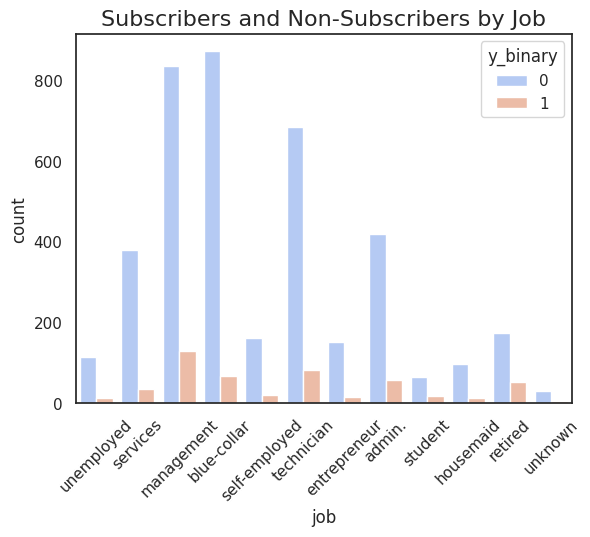

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

ax = sns.countplot(x='job', hue='y_binary', data=df, palette='coolwarm')
plt.title('Subscribers and Non-Subscribers by Job', fontsize=16)
plt.xticks(rotation=45)

plt.show()

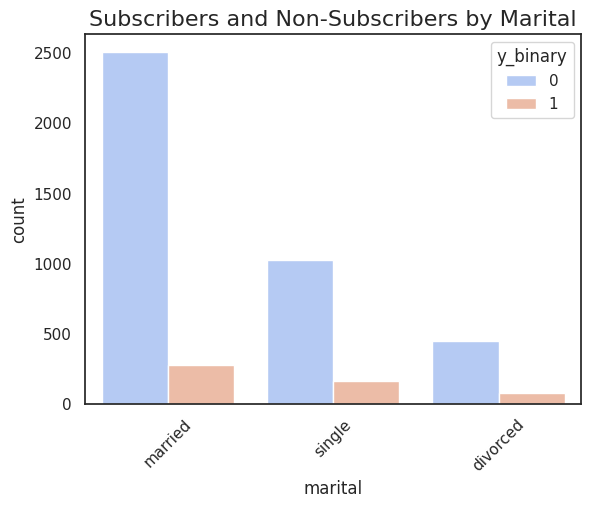

In [ ]:
sns.set(style="white")

ax = sns.countplot(x='marital', hue='y_binary', data=df, palette='coolwarm')
plt.title('Subscribers and Non-Subscribers by Marital', fontsize=16)
plt.xticks(rotation=45)

plt.show()

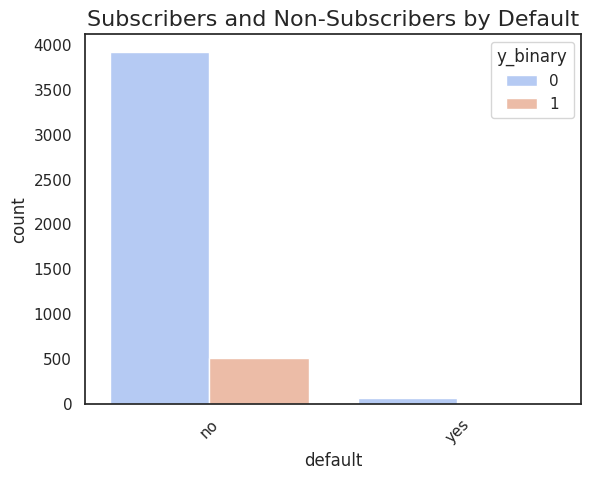

In [ ]:
sns.set(style="white")

ax = sns.countplot(x='default', hue='y_binary', data=df, palette='coolwarm')
plt.title('Subscribers and Non-Subscribers by Default', fontsize=16)
plt.xticks(rotation=45)

plt.show()

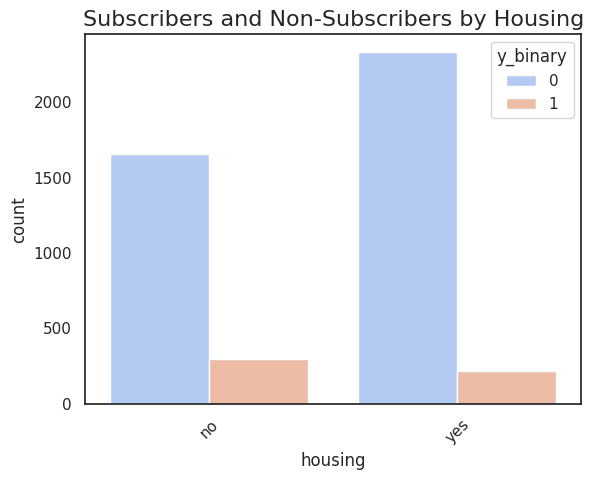

In [ ]:
sns.set(style="white")

ax = sns.countplot(x='housing', hue='y_binary', data=df, palette='coolwarm')
plt.title('Subscribers and Non-Subscribers by Housing', fontsize=16)
plt.xticks(rotation=45)

plt.show()

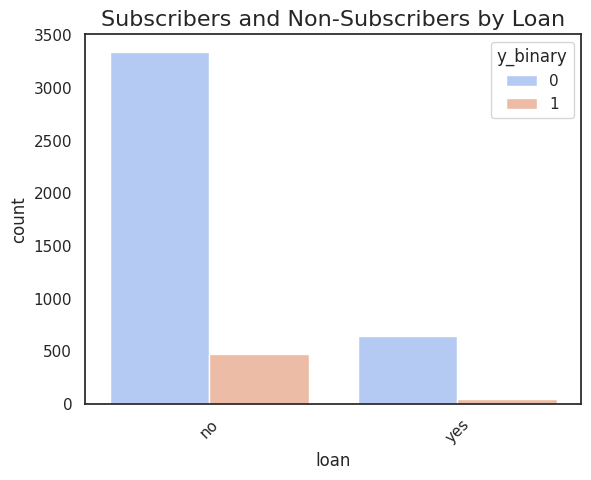

In [ ]:
sns.set(style="white")

ax = sns.countplot(x='loan', hue='y_binary', data=df, palette='coolwarm')
plt.title('Subscribers and Non-Subscribers by Loan', fontsize=16)
plt.xticks(rotation=45)

plt.show()

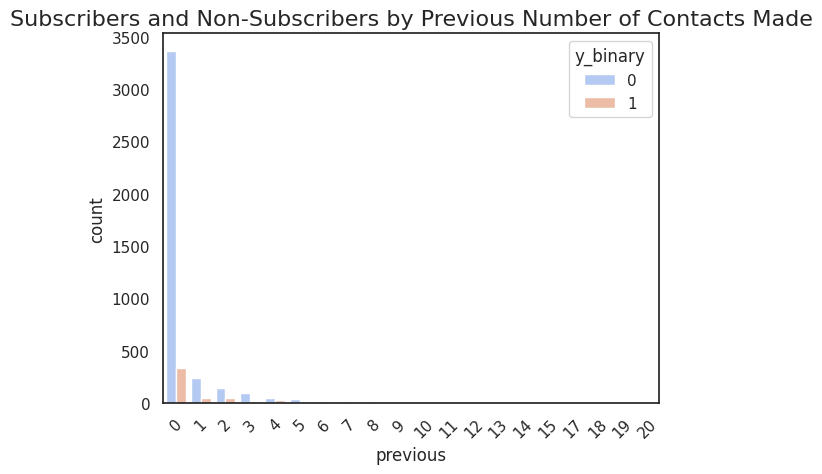

In [ ]:
sns.set(style="white")

ax = sns.countplot(x='previous', hue='y_binary', data=df, palette='coolwarm')
plt.title('Subscribers and Non-Subscribers by Previous Number of Contacts Made', fontsize=16)
plt.xticks(rotation=45)

plt.show()

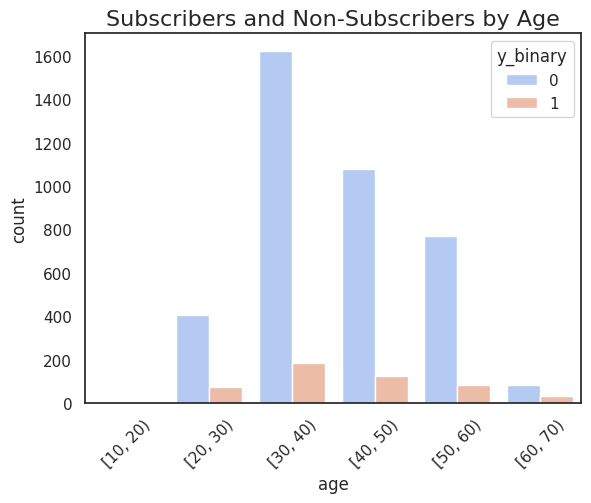

In [ ]:
sns.set(style="white")

df['age'] = pd.cut(df['age'], bins=range(10, 80, 10), right=False)
ax = sns.countplot(x='age', hue='y_binary', data=df, palette='coolwarm')
plt.title('Subscribers and Non-Subscribers by Age', fontsize=16)
plt.xticks(rotation=45)

plt.show()

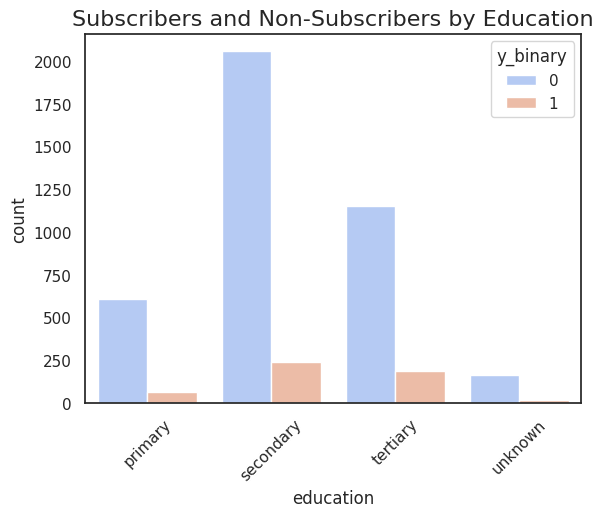

In [ ]:
sns.set(style="white")

ax = sns.countplot(x='education', hue='y_binary', data=df, palette='coolwarm')
plt.title('Subscribers and Non-Subscribers by Education', fontsize=16)
plt.xticks(rotation=45)

plt.show()

The idea of these visuals is to check how different job types, ages, education levels, etc., are affecting a person's decision to invest in a term deposit or not. Looking at the bar charts, it seems that people in management tend to invest more, followed by self-employed individuals and entrepreneurs. We can further see that married and single people tend to invest more compared to divorced individuals. People with no default history and no loans are also more inclined to invest, which can be supported by the fact that people without houses are investing more, possibly because they have more available funds. The charts also show that increasing the number of contacts made doesn't encourage people to invest more in term deposits. In fact, people contacted once, twice, or thrice were more likely to invest. Moreover, people in the age group of 30 to 40 are likely to invest more, followed by those in the age group of 40 to 50, probably because of the reason that they have more investment funds available as compared to other age brackets. Lastly, people with secondary or tertiary level education are more likely to invest in term deposits compared to other education levels.